<center>
<img src="logo.png" height="900"> 
</center>


#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции. 

In [3]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

__Под чёрточками имеется в виду условная вероятность!!!__

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

X = sts.poisson.rvs(2, size=10**6)
ans1 = np.mean(X > 6)
ans2 = np.mean(X > 6)/np.mean(X > 5)
ans3 = np.mean((X > 5) & (X > 7))
ans4 = np.mean(X**3)
ans5 = np.mean(X[X > 5])

print(ans1, ans2, ans3, ans4, ans5, sep="\n")


0.004555
0.2782189103347178
0.00104
21.916715
6.359333007573906


In [6]:
# проверка, что задание решено корректно
assert np.abs(ans3 - 0.01) < 1e-2

# Похожие тесты скрыты от вас

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента падения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

T1 = sts.uniform.rvs(1, 2, size = 10**6)
T2 = sts.uniform.rvs(1, 2, size = 10**6)
fail = sts.expon.rvs(scale = 1 / 0.3, size = 10**6)
ans6 = np.mean(fail[(T1 > fail) != (T2 > fail)] <= 1.5)
ans6


0.19068326357558296

In [11]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1

# Похожие тесты скрыты от вас

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

theta = 10
alpha = 2
X = theta**(np.random.uniform(size = 10**6)**(1 / alpha))
ans7 = np.mean(X)



Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

(array([0.0306189 , 0.07170347, 0.09501919, 0.11217667, 0.12212545,
        0.13046798, 0.1356369 , 0.13769891, 0.1371709 , 0.13949413,
        0.13918844, 0.13737099, 0.13573694, 0.13530342, 0.13301353,
        0.13266894, 0.13133502, 0.12858382, 0.12783349, 0.12609941,
        0.12356497, 0.1233093 , 0.12072484, 0.11938537, 0.1168676 ,
        0.11663417, 0.1147778 , 0.11358284, 0.11184319, 0.10940324,
        0.10790259, 0.10832499, 0.10622408, 0.10660202, 0.10357848,
        0.10127748, 0.10121634, 0.10001581, 0.09845402, 0.09810943,
        0.09675884, 0.09525819, 0.09412436, 0.09169552, 0.09254033,
        0.09089517, 0.0906673 , 0.08847745, 0.0880606 , 0.08845522]),
 array([1.00392047, 1.18384201, 1.36376356, 1.5436851 , 1.72360665,
        1.9035282 , 2.08344974, 2.26337129, 2.44329283, 2.62321438,
        2.80313592, 2.98305747, 3.16297902, 3.34290056, 3.52282211,
        3.70274365, 3.8826652 , 4.06258675, 4.24250829, 4.42242984,
        4.60235138, 4.78227293, 4.96219448, 5.

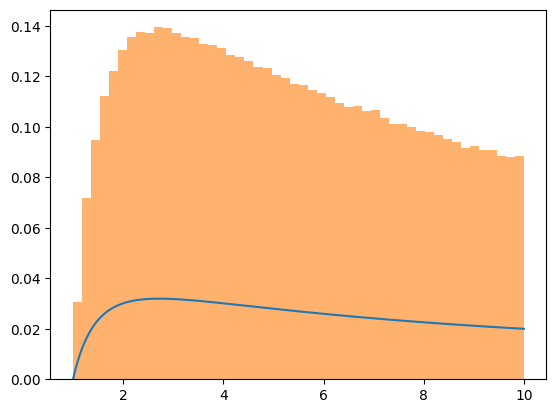

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

trans_pdf = 0.2 * (np.log(np.linspace(1, 10, 1000)) / np.log(10)) / np.linspace(1, 10, 1000)
plt.plot(np.linspace(1, 10, 1000), trans_pdf)
plt.hist(X, bins = 50, density = True, alpha = 0.6)


In [16]:
# проверка, что задание решено корректно
assert ans7 < 6
assert ans7 > 2

# Похожие тесты скрыты от вас

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по вероятности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

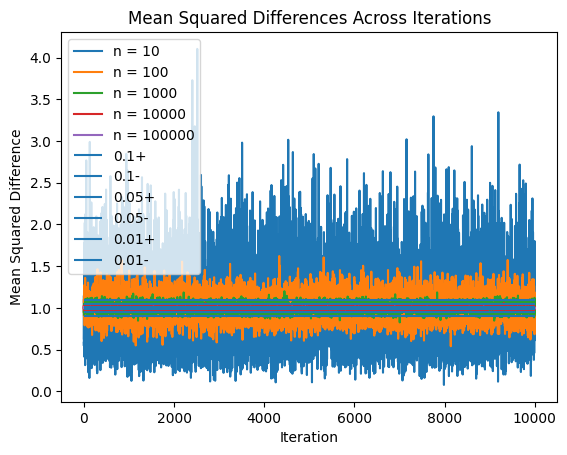

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

sample_sizes = [10, 100, 1000, 10**4, 10**5]
epsilon_values = [0.1, 0.05, 0.01]

for sample_size in sample_sizes:
    differences = [] 
    for _ in range(10**4):
        random_samples = np.random.normal(size=sample_size) 
        mean_squared_difference = np.sum(random_samples**2) / sample_size
        differences.append(mean_squared_difference)

    plt.plot(range(10**4), differences, label=f'n = {sample_size}')

for epsilon in epsilon_values:
    plt.hlines(1 + epsilon, 0, 10**4, label=f'{epsilon}+') 
    plt.hlines(1 - epsilon, 0, 10**4, label=f'{epsilon}-')

# Add labels and legend
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Difference')
plt.title('Mean Squared Differences Across Iterations')
plt.legend()
plt.show()